#  Project: Paediatric Appendicitis
Dataset obtained from a study of paediatric patients admitted with abdominal pain to St. Hedwig Children's Hospital in Regensburg, Germany. The dataset includes information covering laboratory tests, physical examination findings, clinical assessments and so on.

Patients were categorised according to three target variables:

Diagnosis (appendicitis vs. no appendicitis),
treatment (surgical vs. conservative),
severity (complicated vs. uncomplicated or no appendicitis).


## I. Data loading and preparation

- Let's load the necessary libraries for this purpose

In [751]:
# Updating openpyxl for further work with the database

!pip install --upgrade openpyxl
import openpyxl
print(openpyxl.__version__)

3.1.5



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ТЕСТ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [752]:
import pandas as pd                 
import numpy as np                   
import seaborn as sns                
from matplotlib import pyplot as plt 

In [753]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Import classes for categorical feature coding and data standardisation

- Load data

In [754]:
data = pd.read_excel('app_data.xlsx')
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [755]:
data.shape

(782, 58)

* Let's see some information about the signs

In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

Lots of NaN. We need to familiarise ourselves with each post, for correct NaN replacement.

* Let's find out the number of unique values in each column

In [757]:
data.nunique()

Age                                 715
BMI                                 639
Sex                                   2
Height                              187
Weight                              268
Length_of_Stay                       19
Management                            4
Severity                              2
Diagnosis_Presumptive                16
Diagnosis                             2
Alvarado_Score                       11
Paedriatic_Appendicitis_Score        11
Appendix_on_US                        2
Appendix_Diameter                    78
Migratory_Pain                        2
Lower_Right_Abd_Pain                  2
Contralateral_Rebound_Tenderness      2
Coughing_Pain                         2
Nausea                                2
Loss_of_Appetite                      2
Body_Temperature                     46
WBC_Count                           210
Neutrophil_Percentage               355
Segmented_Neutrophils                39
Neutrophilia                          2


* Let's look at the statistics of the numerical traits

In [758]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,781.0,11.35,3.53,0.00,9.20,11.44,14.10,18.36
BMI,755.0,18.91,4.39,7.83,15.73,18.06,21.18,38.16
Height,756.0,148.02,19.73,53.00,137.00,149.65,163.00,192.00
Weight,779.0,43.17,17.39,3.96,29.50,41.40,54.00,103.00
Length_of_Stay,778.0,4.28,2.57,1.00,3.00,3.00,5.00,28.00
Alvarado_Score,730.0,5.92,2.16,0.00,4.00,6.00,8.00,10.00
Paedriatic_Appendicitis_Score,730.0,5.25,1.96,0.00,4.00,5.00,7.00,10.00
Appendix_Diameter,498.0,7.76,2.54,2.70,6.00,7.50,9.10,17.00
Body_Temperature,775.0,37.40,0.90,26.90,36.80,37.20,37.90,40.20
WBC_Count,776.0,12.67,5.37,2.60,8.20,12.00,16.20,37.70


*  Let's look at the statistics of category attributes.

In [759]:
data.describe(include='object').T

,count,unique,top,freq
Sex,780,2,male,403
Management,781,4,conservative,483
Severity,781,2,uncomplicated,662
Diagnosis_Presumptive,780,16,appendicitis,682
Diagnosis,780,2,appendicitis,463
Appendix_on_US,777,2,yes,504
Migratory_Pain,773,2,no,562
Lower_Right_Abd_Pain,774,2,yes,733
Contralateral_Rebound_Tenderness,767,2,no,469
Coughing_Pain,766,2,no,548


* Let's count the number of values of all dataset attributes, including missing ones

In [760]:
for col in data.columns:
    print(f'Attribute:  {data[col].value_counts(dropna=False)}')
    print()

Attribute:  Age
11.050000    4
6.640000     3
14.198494    3
9.250000     3
13.830000    3
            ..
7.882272     1
14.351814    1
17.092402    1
14.992471    1
7.195072     1
Name: count, Length: 716, dtype: int64

Attribute:  BMI
NaN          27
16.000000     6
16.600000     5
19.600000     5
16.900000     4
             ..
25.250476     1
20.429418     1
19.909972     1
14.295549     1
18.171441     1
Name: count, Length: 640, dtype: int64

Attribute:  Sex
male      403
female    377
NaN         2
Name: count, dtype: int64

Attribute:  Height
NaN      26
140.0    20
158.0    20
165.0    16
160.0    16
         ..
161.8     1
96.3      1
170.4     1
179.4     1
129.3     1
Name: count, Length: 188, dtype: int64

Attribute:  Weight
50.00    23
45.00    16
33.00    16
53.00    14
54.00    14
         ..
3.96      1
34.60     1
26.70     1
23.90     1
37.90     1
Name: count, Length: 269, dtype: int64

Attribute:  Length_of_Stay
3.0     345
4.0     123
2.0      78
5.0      74
6.0  

- We sequentially clean the stacks from NaN, and code category attributes for further work on estimating outliers and anomalies.
1. Age

In [761]:
data[data['Age'].isna()] 

# Only 1 NaN, looking at the line we see - the whole line is not informative
data.dropna(subset=['Age'], axis=0, inplace=True)

# Let's round up the values
data['Age'] = data['Age'].round(2)

2. BMI

In [762]:
data[data['BMI'].isna()]

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
7,7.06,NaN,female,NaN,21.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
27,17.82,NaN,female,NaN,52.0,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zyste Uterus
34,11.40,NaN,male,NaN,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
36,5.71,NaN,male,NaN,19.5,2.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
37,14.15,NaN,male,NaN,50.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,UB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,15.90,NaN,female,NaN,54.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,no,no,no,yes,NaN,no,NaN
49,15.72,NaN,female,NaN,52.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,9.10,NaN,male,NaN,25.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,periumbilikal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,12.68,NaN,female,NaN,39.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,14.23,NaN,male,NaN,54.0,4.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,re UB,NaN,NaN,NaN,NaN,yes,yes,NaN


As we can see, the main reason for NaN in the ‘BMI’ column is the absence of the ‘Height’ value.
Where possible, we will calculate BMI, and if one of the arguments for calculation is missing, we will calculate BMI and Height by the average based on the medical norm of weight/height ratio for children.

In [763]:
# Calculating BMI where there is no BMI, but there is weight and height
calc_bmi = data['BMI'].isna() & data['Height'].notna() & data['Weight'].notna()
data.loc[calc_bmi, 'BMI'] = data.loc[calc_bmi, 'Weight'] / (data.loc[calc_bmi, 'Height'] / 100) ** 2

bmi_norms = {'male': 17.0, 'female': 17.2}

for i, row in data[data['BMI'].isna() & data['Weight'].notna()].iterrows():
    norm_bmi = bmi_norms[row['Sex']]
    if pd.notna(norm_bmi):
        est_height = (row['Weight'] / norm_bmi) ** 0.5 * 100
        data.at[i, 'BMI'] = norm_bmi
        data.at[i, 'Height'] = est_height

# Checking
data[data['BMI'].isna()]


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
499,18.36,NaN,female,NaN,NaN,4.0,secondary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,yes,rechter Unterbauch,no,NaN,NaN,NaN,yes,NaN,Ausschluss pathologischer Ovarialbefund
750,13.37,NaN,male,NaN,NaN,3.0,secondary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The remaining two children have interesting and useful medical records, I don't want to delete their medical history. I will give them a weight and height average for their ages and sexes

In [764]:
for i, row in data[data['Weight'].isna() & data['Height'].isna()].iterrows():
    sex = row['Sex']
    age = row['Age']

    # finding similar age and sex
    similar = data[
        (data['Sex'] == sex) &
        (data['Age'].between(age - 1, age + 1)) &
        data['Weight'].notna() &
        data['Height'].notna()]

    mean_weight = similar['Weight'].mean()
    mean_height = similar['Height'].mean()
    mean_bmi = mean_weight / (mean_height / 100) ** 2
    data.at[i, 'Weight'] = mean_weight
    data.at[i, 'Height'] = mean_height
    data.at[i, 'BMI'] = mean_bmi

# Let's round up the values
data['BMI'] = data['BMI'].round(2)

# Checking
data[data['BMI'].isna()]

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings


3. Sex

In [765]:
data[data['Sex'].isna()] # Only one line. 


# Let's code the column
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# To avide losing patient data, we'll fill NaN by 0.5
data['Sex'] = data['Sex'].fillna(0.5)



* Let's find out the number of unique values in each column

4. Height

In [766]:
data[data["Height"].isna()] # Fine, earlier we filled in the NaN in this column

# Let's round up the values
data['Height'] = data['Height'].round(0)


5. Weight

In [767]:
data[data["Weight"].isna()] #That's fine.

# Let's round up the values
data['Weight'] = data['Weight'].round(1)

6. Length_of_Stay


In [768]:
data[data['Length_of_Stay'].isna()] 

# Let's round up the values
data['Length_of_Stay'] = data['Length_of_Stay'].round(0)

# To avoid losing patient data, we will insert the dataset's median value
data['Length_of_Stay'] = pd.to_numeric(data['Length_of_Stay'], errors='coerce')
median_los = data['Length_of_Stay'].median()
data['Length_of_Stay'] = data['Length_of_Stay'].fillna(median_los)


7. Management

In [769]:
data[data['Management'].isna()] #That's fine.

# This is a categorical attribute. I'll come back to it later

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings


8. Severity

In [770]:
data[data['Severity'].isna()] #That's fine.

# Let's code attribute
data['Severity'] = data['Severity'].map({'uncomplicated': 0, 'complicated': 1})

9. Diagnosis_Presumptive

In [771]:
data[data['Diagnosis_Presumptive'].isna()]

# I have no data to replace NaN with something.
data.dropna(subset=['Diagnosis_Presumptive'], axis = 0, inplace=True)

# This is a categorical attribute. I'll come back to it later

10. Diagnosis

In [772]:
data[data['Diagnosis'].isna()]

# I have no data to replace NaN with something.
data.dropna(subset=['Diagnosis'], axis = 0, inplace=True)

data['Diagnosis'] = data['Diagnosis'].map({'appendicitis': 1, 'no appendicitis': 0})
print(data['Diagnosis'].value_counts(dropna=False))

Diagnosis
1    463
0    316
Name: count, dtype: int64


11. Alvarado_Score

In [773]:
data[data['Alvarado_Score'].isna()]

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
11,16.28,20.50,1.0,174.0,62.2,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,13.89,18.00,0.0,149.0,40.0,4.0,conservative,0,appendicitis,0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,15.16,20.80,1.0,167.0,58.0,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,16.43,26.60,0.0,170.0,77.0,2.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,5.16,17.00,0.0,116.0,23.0,3.0,conservative,0,appendicitis,1,...,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
151,10.90,23.30,0.0,148.0,51.0,5.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,16.52,19.60,1.0,158.0,49.0,3.0,conservative,0,appendicitis,1,...,NaN,yes,re UB,NaN,NaN,NaN,NaN,NaN,NaN,Ovarialzyste
171,12.70,27.70,1.0,159.0,69.5,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,10.45,16.90,0.0,146.0,35.5,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,14.43,17.60,1.0,160.0,45.0,4.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The traditional Alvarado score is composed of the following:

Criterion________________________ Points

Migration of pain __________________1

Anorexia (loss of appetite)________1

Nausea/vomiting__________________1

Tenderness in RLQ_________________2

Rebound pain______________________1

Elevated temperature______________1

Leukocytosis (↑ WBC)______________2

Neutrophilia_______________________1

From dataset, I see matching columns like:
Migratory_Pain, Loss_of_Appetite, Nausea,Lower_Right_Abd_Pain, Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness, Body_Temperature, WBC_Count,Neutrophilia, Neutrophil_Percentage

In [774]:
# List of required columns for Alvarado score calculation
alvarado_columns = [
    'Migratory_Pain',
    'Loss_of_Appetite',
    'Nausea',
    'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Ipsilateral_Rebound_Tenderness',
    'Body_Temperature',
    'WBC_Count',
    'Neutrophilia',
    'Neutrophil_Percentage'
]

alvarado_columns_yes_no = [
    'Migratory_Pain',
    'Loss_of_Appetite',
    'Nausea',
    'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Ipsilateral_Rebound_Tenderness',
    'Neutrophilia'
]
# Code data : 'no' = 0, 'yes'=1
for col in alvarado_columns_yes_no :
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Let's round up the values
data['Body_Temperature'] = data['Body_Temperature'].round(1)

# View rows where Alvarado_Score is NaN but all needed fields are available
recalculatable_rows = data[
    data['Alvarado_Score'].isna() & 
    data[alvarado_columns].notna().all(axis=1)
]

# Display the relevant part
recalculatable_rows[alvarado_columns + ['Alvarado_Score']]

,Migratory_Pain,Loss_of_Appetite,Nausea,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Body_Temperature,WBC_Count,Neutrophilia,Neutrophil_Percentage,Alvarado_Score


Ok, apparently the lack of alvarado score is due to omissions in the relevant columns. Let's check the number of NaN's in each row

In [775]:
# Select rows where Alvarado_Score is NaN
nan_score_rows = data[data['Alvarado_Score'].isna()]

# Count NaNs in the alvarado_columns for each of those rows
nan_counts = nan_score_rows[alvarado_columns].isna().sum(axis=1)

# Add the count as a new column for clarity
nan_score_rows = nan_score_rows.copy()  # to avoid SettingWithCopyWarning
nan_score_rows['NaN_in_required_fields'] = nan_counts

# Display the counts along with the Alvarado_Score column (which will be NaN)
nan_score_rows[['NaN_in_required_fields', 'Alvarado_Score']]


,NaN_in_required_fields,Alvarado_Score
11,2,NaN
23,2,NaN
116,2,NaN
123,2,NaN
137,2,NaN
151,2,NaN
158,2,NaN
171,2,NaN
173,2,NaN
181,2,NaN


I can suggest two ways to solve the problem:
1) Delete all rows with NaN, which is about 7% of all data.
2) Remove rows where I will definitely not be able to calculate Alvarado score with high accuracy. Giving median values.

I will take the second path and remove rows with more than 4 columns missing data.

First, i will count how many missing values per required column

In [776]:
print(data[alvarado_columns].isna().sum())

Migratory_Pain                        7
Loss_of_Appetite                      8
Nausea                                6
Lower_Right_Abd_Pain                  6
Contralateral_Rebound_Tenderness     13
Ipsilateral_Rebound_Tenderness      161
Body_Temperature                      5
WBC_Count                             4
Neutrophilia                         48
Neutrophil_Percentage               101
dtype: int64


Second, i will try to find a pattern of missing value visualy

In [777]:
# visualisation
!pip install missingno 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ТЕСТ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


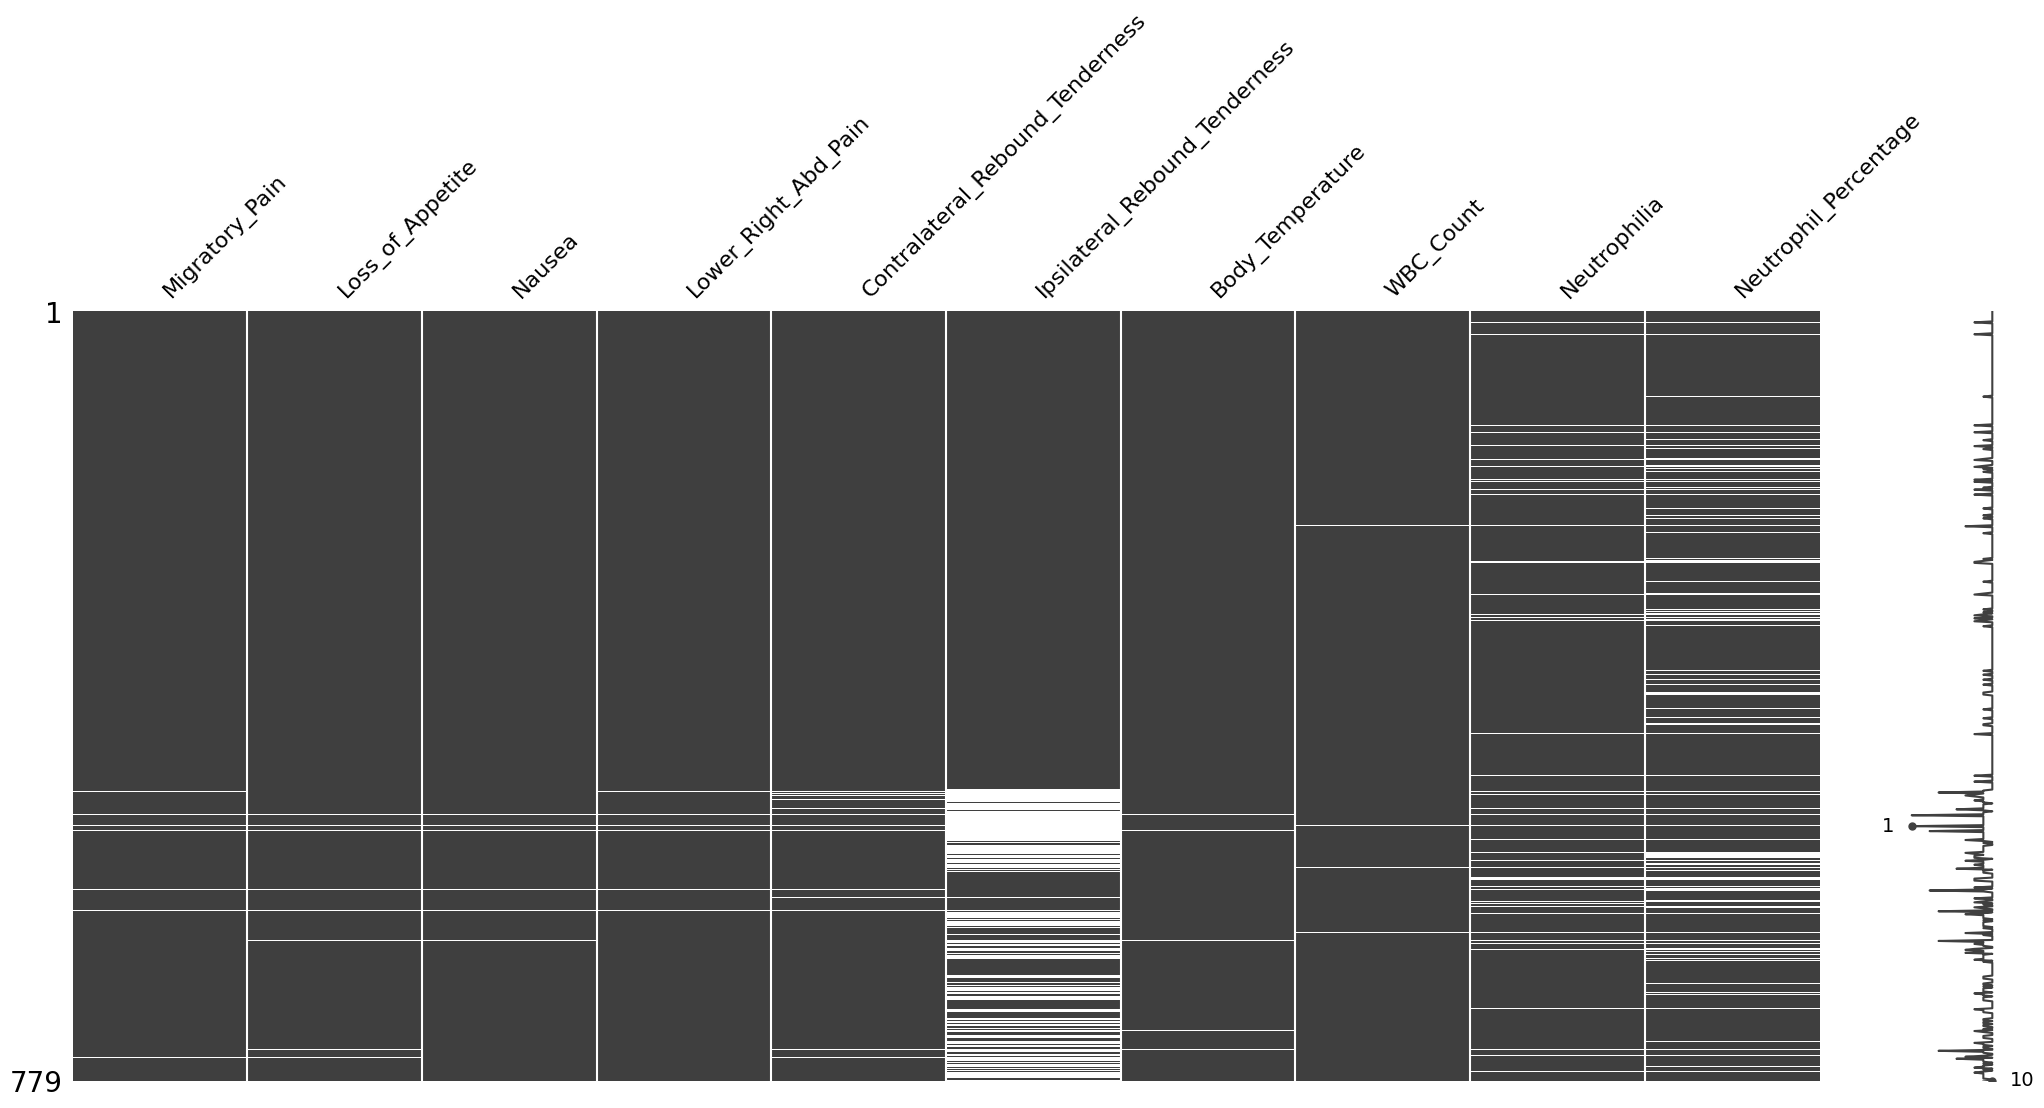

In [778]:

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data[alvarado_columns])
plt.show()


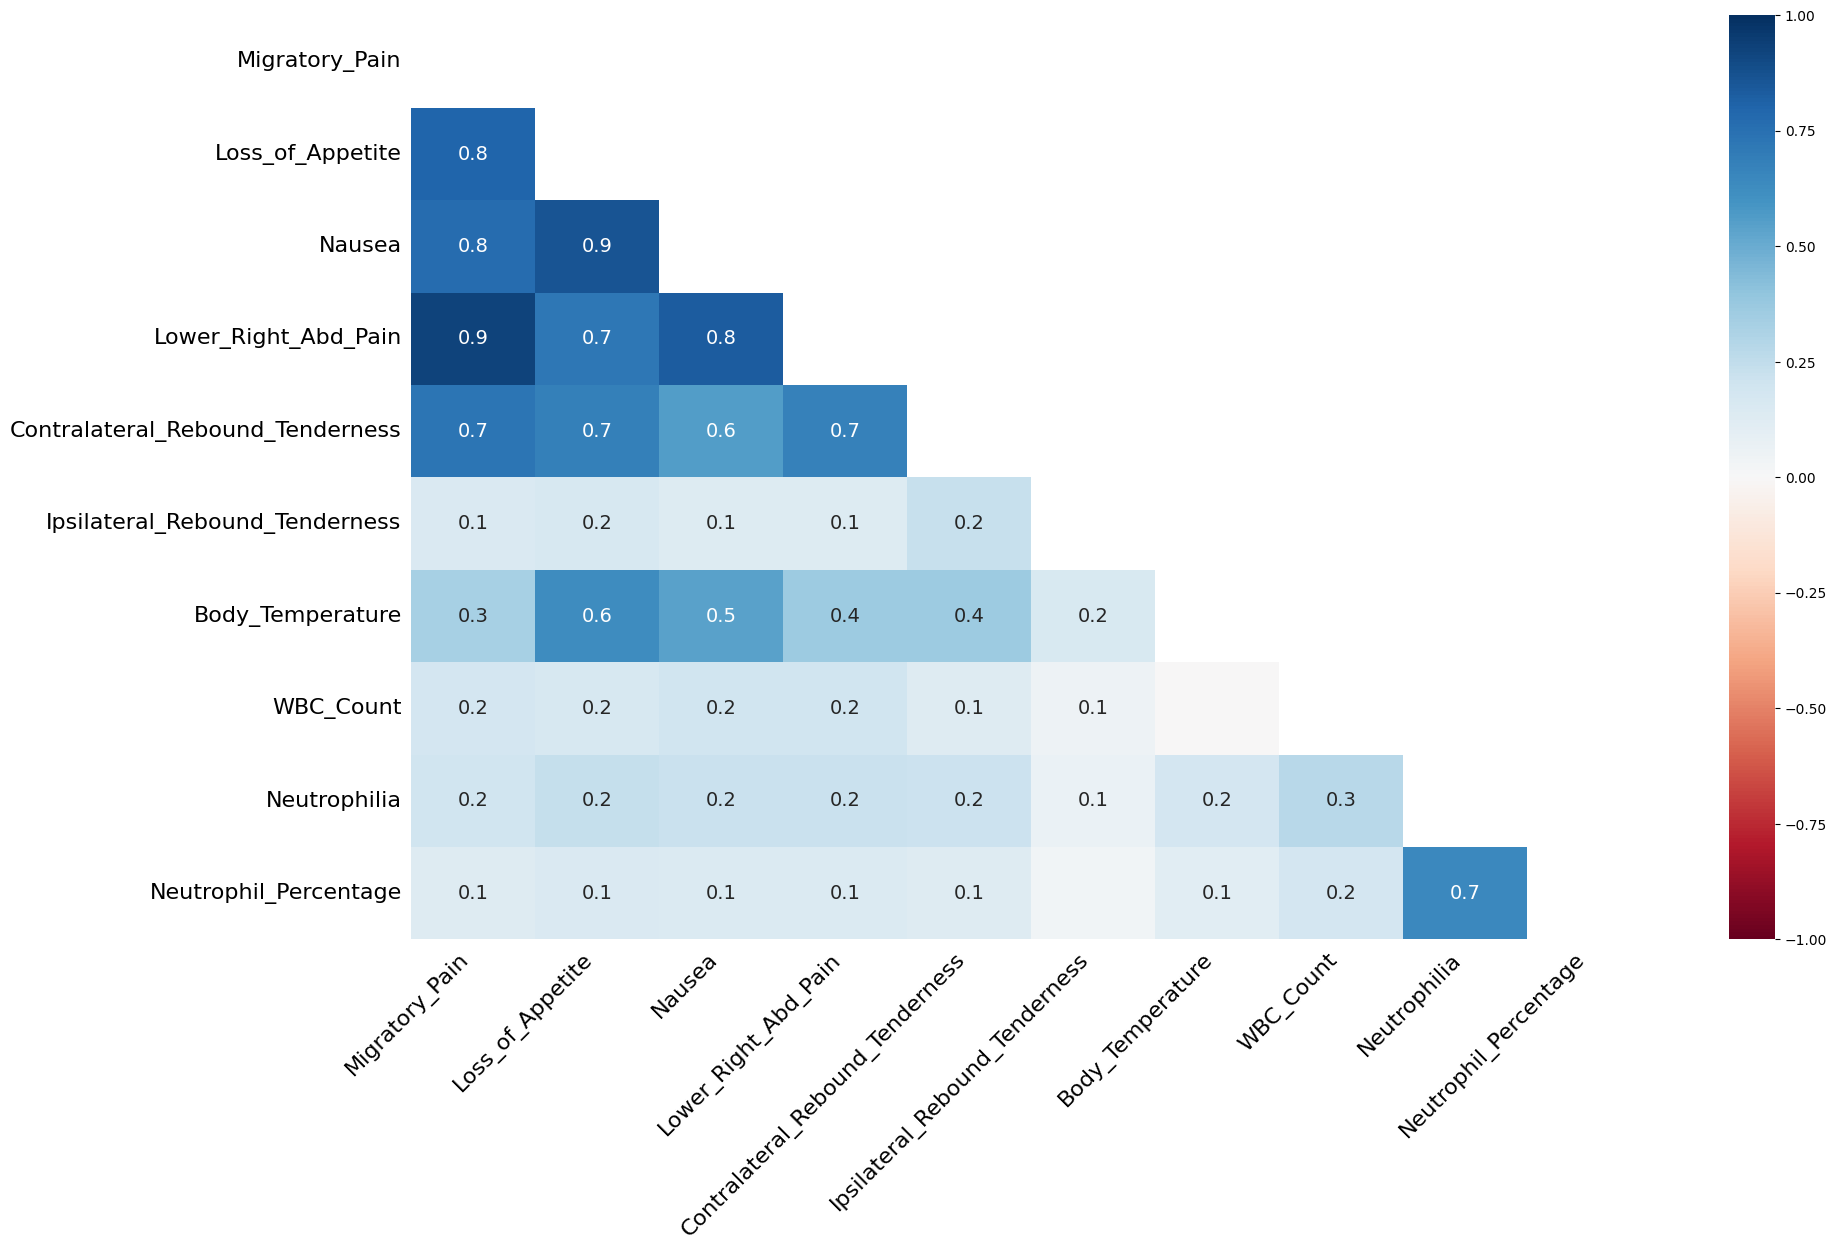

In [779]:
msno.heatmap(data[alvarado_columns])
plt.show()

Without Ipsilateral_Rebound_Tenderness, I can't count Alvarado score correctly. But theare a lot of missing data.I need to fill them out the best way I can. 
Remember that Alvarado scores don't have only 50 rows, which means by back-counting I can find Ipsilateral_Rebound_Tenderness values for more than 100 rows.

Let's start filling/dropping in the columns sequentially with few skips, and then count Ipsilateral_Rebound_Tenderness using the backward method.

In [780]:
# Filter rows with more than 5 NaNs in required fields
rows_to_drop = nan_score_rows[nan_score_rows['NaN_in_required_fields'] > 5].index

# Drop these rows from your original dataset
data = data.drop(rows_to_drop)


In [781]:
print(data[alvarado_columns].isna().sum())

Migratory_Pain                        1
Loss_of_Appetite                      1
Nausea                                0
Lower_Right_Abd_Pain                  0
Contralateral_Rebound_Tenderness      6
Ipsilateral_Rebound_Tenderness      154
Body_Temperature                      1
WBC_Count                             3
Neutrophilia                         42
Neutrophil_Percentage                95
dtype: int64


In [782]:
# Columns to fill with mode
columns_to_median_fill = [
    'Migratory_Pain', 'Loss_of_Appetite', 'Nausea',
    'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness'
]

for col in columns_to_median_fill:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Column to fill average value
mean_column = ['Body_Temperature', 'WBC_Count']
for col in mean_column:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Let's round up the values
data['Body_Temperature'] = data['Body_Temperature'].round(1)
data['WBC_Count'] = data['WBC_Count'].round(2)

# Checking
print(data[alvarado_columns].isna().sum())

Migratory_Pain                        0
Loss_of_Appetite                      0
Nausea                                0
Lower_Right_Abd_Pain                  0
Contralateral_Rebound_Tenderness      0
Ipsilateral_Rebound_Tenderness      154
Body_Temperature                      0
WBC_Count                             0
Neutrophilia                         42
Neutrophil_Percentage                95
dtype: int64


C:\Users\ТЕСТ\AppData\Local\Temp\ipykernel_14476\2591003158.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
C:\Users\ТЕСТ\AppData\Local\Temp\ipykernel_14476\2591003158.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Neutrophilia and Neutrophil_Percentage are related. If the Neutrophil_Percentage value is greater than 75%, Neutrophilia is diagnosed. Let's see if that's true

In [783]:
# Drop rows where Neutrophil_Percentage is NaN for this check
subset = data.dropna(subset=['Neutrophil_Percentage'])

# Create boolean series for >75% condition
neutrophil_check = subset['Neutrophil_Percentage'] >= 75

# Convert to int (1 or 0) to compare with Neutrophilia
neutrophil_check_int = neutrophil_check.astype(int)

# Compare with Neutrophilia column in the subset
matches = (neutrophil_check_int == subset['Neutrophilia'])

# Count right and wrong matches
num_right = matches.sum()
num_wrong = (~matches).sum()
total = len(subset)

# Calculate percentages
pct_right = num_right / total * 100
pct_wrong = num_wrong / total * 100

print(f"Total rows checked (excluding NaNs): {total}")
print(f"Right matches: {num_right} ({pct_right:.2f}%)")
print(f"Wrong matches: {num_wrong} ({pct_wrong:.2f}%)")

# Show the wrong rows
wrong_rows = subset[~matches][['Neutrophil_Percentage', 'Neutrophilia']]
print("\nRows where Neutrophilia diagnosis does NOT match Neutrophil_Percentage > 75%:")
print(wrong_rows)


Total rows checked (excluding NaNs): 676
Right matches: 672 (99.41%)
Wrong matches: 4 (0.59%)

Rows where Neutrophilia diagnosis does NOT match Neutrophil_Percentage > 75%:
     Neutrophil_Percentage  Neutrophilia
560                   75.0           0.0
602                   84.5           NaN
611                   86.1           0.0
774                   75.0           0.0


The error in the diagnosis data is small. We'll fix it.

In [784]:
# Update Neutrophilia 
mask = data['Neutrophil_Percentage'].notna()
data.loc[mask, 'Neutrophilia'] = (data.loc[mask, 'Neutrophil_Percentage'] >= 75).astype(int)

# Checking
print(data[alvarado_columns].isna().sum())


Migratory_Pain                        0
Loss_of_Appetite                      0
Nausea                                0
Lower_Right_Abd_Pain                  0
Contralateral_Rebound_Tenderness      0
Ipsilateral_Rebound_Tenderness      154
Body_Temperature                      0
WBC_Count                             0
Neutrophilia                         41
Neutrophil_Percentage                95
dtype: int64


Thus we are left with NaN in the ‘Neutrophilia’ column where there is no reference value in the ‘Neutrophil_Percentage’ column. The ‘Neutrophil_Percentage’ column is no longer useful for calculating the Alvarado score.

For the rows with no data on ‘Neutrophilia’ set the value Neutrophilia - 0.5. In further calculations we will see these patients and know their status as ‘presumptively diagnosed’

In [785]:
data['Neutrophilia'].fillna(0.5, inplace=True)
# Checking
print(data[alvarado_columns].isna().sum())

Migratory_Pain                        0
Loss_of_Appetite                      0
Nausea                                0
Lower_Right_Abd_Pain                  0
Contralateral_Rebound_Tenderness      0
Ipsilateral_Rebound_Tenderness      154
Body_Temperature                      0
WBC_Count                             0
Neutrophilia                          0
Neutrophil_Percentage                95
dtype: int64


C:\Users\ТЕСТ\AppData\Local\Temp\ipykernel_14476\1572288277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Neutrophilia'].fillna(0.5, inplace=True)


Let's proceed to calculate Ipsilateral_Rebound_Tenderness if we know all the values and Alvarado score

In [786]:
# First, map all known columns to their Alvarado points per item

# These columns are assumed to be binary (0 or 1) except for WBC_Count and Body_Temperature which have different thresholds.

def score_body_temperature(temp):
    return 1 if temp >= 37.3 else 0

def score_wbc_count(wbc):
    return 2 if wbc > 10 else 0  # Leukocytosis cutoff usually >10,000

def score_neutrophilia(n):
    return 1 if n == 1 else 0

# Calculate sum of known scores excluding Ipsilateral_Rebound_Tenderness (which is unknown)
data['Known_score_sum'] = (
    data['Migratory_Pain'] * 1 +
    data['Loss_of_Appetite'] * 1 +
    data['Nausea'] * 1 +
    data['Lower_Right_Abd_Pain'] * 2 +
    data['Contralateral_Rebound_Tenderness'] * 1 +  # Contralateral rebound counts as 1 point here
    data['Body_Temperature'].apply(score_body_temperature) +
    data['WBC_Count'].apply(score_wbc_count) +
    data['Neutrophilia'].apply(score_neutrophilia)
)

# Ipsilateral_Rebound_Tenderness should be 1 if Alvarado_score - Known_score_sum = 1, else 0
data['Ipsilateral_Rebound_Tenderness'] = (data['Alvarado_Score'] - data['Known_score_sum']).apply(lambda x: 1 if x == 1 else 0)

# Check for negative or unexpected values
data.loc[data['Ipsilateral_Rebound_Tenderness'] < 0, 'Ipsilateral_Rebound_Tenderness'] = 0

# Convert to int
data['Ipsilateral_Rebound_Tenderness'] = data['Ipsilateral_Rebound_Tenderness'].astype(int)

# Checking results
print(data[alvarado_columns].isna().sum())



Migratory_Pain                       0
Loss_of_Appetite                     0
Nausea                               0
Lower_Right_Abd_Pain                 0
Contralateral_Rebound_Tenderness     0
Ipsilateral_Rebound_Tenderness       0
Body_Temperature                     0
WBC_Count                            0
Neutrophilia                         0
Neutrophil_Percentage               95
dtype: int64


Let's look again at the missing values of the Alvarado score

In [787]:
# Select rows where Alvarado_Score is NaN
nan_score_rows = data[data['Alvarado_Score'].isna()]

# Count NaNs in the alvarado_columns for each of those rows
nan_counts = nan_score_rows[alvarado_columns].isna().sum(axis=1)

# Add the count as a new column for clarity
nan_score_rows = nan_score_rows.copy()  # to avoid SettingWithCopyWarning
nan_score_rows['NaN_in_required_fields'] = nan_counts

# Display the counts along with the Alvarado_Score column (which will be NaN)
nan_score_rows[['NaN_in_required_fields', 'Alvarado_Score']]

# Checking
print(data['Alvarado_Score'].isna().sum())

42


Two rows can be filled in as we have recovered all the counting data

In [788]:
def score_body_temperature(temp):
    return 1 if temp >= 37.3 else 0

def score_wbc_count(wbc):
    return 2 if wbc > 10 else 0  # WBC in thousands, cutoff at 10

def score_neutrophilia(n):
    return 1 if n == 1 else 0

# Calculate Alvarado score from all components
data['Alvarado_score_calculated'] = (
    data['Migratory_Pain'] * 1 +
    data['Loss_of_Appetite'] * 1 +
    data['Nausea'] * 1 +
    data['Lower_Right_Abd_Pain'] * 2 +
    ((data['Contralateral_Rebound_Tenderness'] + data['Ipsilateral_Rebound_Tenderness']) > 0).astype(int) * 1 +  # rebound tenderness counts once
    data['Body_Temperature'].apply(score_body_temperature) +
    data['WBC_Count'].apply(score_wbc_count) +
    data['Neutrophilia'].apply(score_neutrophilia)
)

# Fill NaNs in Alvarado_score with calculated values
mask_nan = data['Alvarado_Score'].isna()
data.loc[mask_nan, 'Alvarado_Score'] = data.loc[mask_nan, 'Alvarado_score_calculated']

# Check if calculated score matches existing Alvarado_score (if any)
data['Alvarado_score_match'] = (data['Alvarado_score_calculated'] == data['Alvarado_Score'])

# Count how many rows have matching scores
matching_count = data['Alvarado_score_match'].sum()
total_rows = len(data)

print(f"Rows with matching Alvarado score: {matching_count} out of {total_rows}")


# Checking
print(data['Alvarado_Score'].isna().sum())


Rows with matching Alvarado score: 704 out of 771
0


In [789]:
# Filter rows where Alvarado_score and calculated score differ
mismatch_rows = data[data['Alvarado_score_calculated'] != data['Alvarado_Score']]

# Show these rows (you can print or display specific columns)
print(mismatch_rows[['Alvarado_Score', 'Alvarado_score_calculated']])

     Alvarado_Score  Alvarado_score_calculated
65              7.0                        8.0
135             0.0                        1.0
219             5.0                        3.0
231             5.0                        4.0
234             3.0                        4.0
..              ...                        ...
763             6.0                        8.0
768             9.0                        8.0
770             7.0                        6.0
774             5.0                        6.0
776             4.0                        5.0

[67 rows x 2 columns]


Let's keep both columns, in the future we will train the models on both and compare the accuracy.

12. Paedriatic_Appendicitis_Score

The pediatric appendicitis score (PAS) is superior in diagnosing acute appendicitis in the pediatric population than the Alvarado score as indicated by the values of diagnostic accuracy. 
I will repeat the same steps I did with the Alvarado score. I'll try to fill in as much NaN as possible.


The traditional PAS is composed of the following:

Criterion________________________ Points

Migration of pain __________________1

Anorexia (loss of appetite)________1

Nausea/vomiting__________________1

Tenderness in RLQ_________________2

Rebound pain______________________1

Elevated temperature______________1

Leukocytosis (↑ WBC)______________2

Neutrophilia_______________________1

From dataset, I see matching columns like:
Migratory_Pain, Loss_of_Appetite, Nausea,Lower_Right_Abd_Pain, Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness, Body_Temperature, WBC_Count,Neutrophilia, Neutrophil_Percentage

In [790]:
data[data['Paedriatic_Appendicitis_Score'].isna()]


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Known_score_sum,Alvarado_score_calculated,Alvarado_score_match
11,16.28,20.50,1.0,174.0,62.2,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,True
23,13.89,18.00,0.0,149.0,40.0,4.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,True
116,15.16,20.80,1.0,167.0,58.0,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,True
123,16.43,26.60,0.0,170.0,77.0,2.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,True
137,5.16,17.00,0.0,116.0,23.0,3.0,conservative,0,appendicitis,1,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
151,10.90,23.30,0.0,148.0,51.0,5.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True
158,16.52,19.60,1.0,158.0,49.0,3.0,conservative,0,appendicitis,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Ovarialzyste,7.0,7.0,True
171,12.70,27.70,1.0,159.0,69.5,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,True
173,10.45,16.90,0.0,146.0,35.5,3.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,True
181,14.43,17.60,1.0,160.0,45.0,4.0,conservative,0,appendicitis,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,True


In [791]:
# List of required columns for Alvarado score calculation
PAS_columns = [
    'Migratory_Pain',
    'Loss_of_Appetite',
    'Nausea',
    'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Ipsilateral_Rebound_Tenderness',
    'Body_Temperature',
    'WBC_Count',
    'Neutrophilia',
    ]


# View rows where PAS is NaN but all needed fields are available
recalculatable_rows = data[
    data['Paedriatic_Appendicitis_Score'].isna() & 
    data[PAS_columns].notna().all(axis=1)
]

# Display the relevant part
recalculatable_rows[PAS_columns + ['Paedriatic_Appendicitis_Score']]
# Select rows where Paedriatic_Appendicitis_Score is NaN
nan_score_rows = data[data['Paedriatic_Appendicitis_Score'].isna()]

# Count NaNs in the PAS_columns for each of those rows
nan_counts = nan_score_rows[PAS_columns].isna().sum(axis=1)

# Add the count as a new column for clarity
nan_score_rows = nan_score_rows.copy()  # to avoid SettingWithCopyWarning
nan_score_rows['NaN_in_required_fields'] = nan_counts

# Display the counts along with the Paedriatic_Appendicitis_Score column (which will be NaN)
nan_score_rows[['NaN_in_required_fields', 'Paedriatic_Appendicitis_Score']]

print(data[PAS_columns].isna().sum())

Migratory_Pain                      0
Loss_of_Appetite                    0
Nausea                              0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Ipsilateral_Rebound_Tenderness      0
Body_Temperature                    0
WBC_Count                           0
Neutrophilia                        0
dtype: int64


Perfect, we can count PAS by ourselves.

In [792]:
def score_body_temperature(temp):
    return 1 if temp >= 38.0 else 0

def score_wbc_count(wbc):
    return 1 if wbc > 10 else 0  # WBC in thousands, cutoff at 10

def score_neutrophilia(n):
    return 1 if n == 1 else 0

# Calculate Alvarado score from all components
data['PAS_score_calculated'] = (
    data['Migratory_Pain'] * 1 +
    data['Loss_of_Appetite'] * 1 +
    data['Nausea'] * 1 +
    data['Lower_Right_Abd_Pain'] * 2 +
    ((data['Contralateral_Rebound_Tenderness'] + data['Ipsilateral_Rebound_Tenderness']) > 0).astype(int) * 2 +  # rebound tenderness counts once
    data['Body_Temperature'].apply(score_body_temperature) +
    data['WBC_Count'].apply(score_wbc_count) +
    data['Neutrophilia'].apply(score_neutrophilia)
)

# Fill NaNs in PAS_score with calculated values
mask_nan = data['Paedriatic_Appendicitis_Score'].isna()
data.loc[mask_nan, 'Paedriatic_Appendicitis_Score'] = data.loc[mask_nan, 'PAS_score_calculated']

# Check if calculated score matches existing PAS_score (if any)
data['PAS_score_match'] = (data['PAS_score_calculated'] == data['Paedriatic_Appendicitis_Score'])

# Count how many rows have matching scores
matching_count = data['PAS_score_match'].sum()
total_rows = len(data)

print(f"Rows with matching PAS: {matching_count} out of {total_rows}")


# Checking
print(data['Paedriatic_Appendicitis_Score'].isna().sum())

# Filter rows where PAS_score and calculated score differ
mismatch_rows = data[data['PAS_score_calculated'] != data['Paedriatic_Appendicitis_Score']]

# Show these rows (you can print or display specific columns)
print(mismatch_rows[['Paedriatic_Appendicitis_Score', 'PAS_score_calculated']])

Rows with matching PAS: 417 out of 771
0
     Paedriatic_Appendicitis_Score  PAS_score_calculated
0                              3.0                   5.0
1                              4.0                   6.0
2                              3.0                   5.0
8                              6.0                   5.0
10                             9.0                   7.0
..                             ...                   ...
770                            4.0                   6.0
772                            4.0                   5.0
773                            7.0                   5.0
774                            3.0                   4.0
776                            6.0                   5.0

[354 rows x 2 columns]


Let's keep both columns, in the future we will train the models on both and compare the accuracy.

13. Appendix_on_US

In [793]:
data[data['Appendix_on_US'].isna()] 
data['Appendix_on_US'] = data['Appendix_on_US'].map({'yes': 1, 'no': 0})
data['Appendix_on_US'].value_counts(dropna=False)

Appendix_on_US
1    502
0    269
Name: count, dtype: int64

14. Appendix_Diameter

In [794]:
print (data['Appendix_Diameter'].isna().sum())

275


I think it's too much NaN, and I don't have the extra information to fill it with some number.

In [795]:
data.drop(columns=['Appendix_Diameter'],inplace=True)
data.shape

(771, 62)

15. Migratory_Pain, Loss_of_Appetite, Nausea, Lower_Right_Abd_Pain, Contralateral_Rebound_Tenderness, 
Ipsilateral_Rebound_Tenderness, Body_Temperature, WBC_Count,
 Neutrophilia

We've cleaned it before.

16. Coughing_Pain

In [796]:
data['Coughing_Pain'] = data['Coughing_Pain'].map({'yes': 1, 'no': 0})
data['Coughing_Pain'] = data['Coughing_Pain'].fillna(0.5)
data['Coughing_Pain'].value_counts(dropna=False)


Coughing_Pain
0.0    547
1.0    218
0.5      6
Name: count, dtype: int64

17. Neutrophil_Percentage

In [797]:
data['Neutrophil_Percentage'].isna().sum()

np.int64(95)

95 NaN is too much, but the column type is variable, so I can put a value of ‘0’ and that way we can immediately see the absence of the result

In [798]:
data['Neutrophil_Percentage'] = data['Neutrophil_Percentage'].fillna(0)

18. Segmented_Neutrophils

In [799]:
data['Segmented_Neutrophils'].isna().sum()

# 717 NaN -> this column is not informative 
data.drop(columns=['Segmented_Neutrophils'],inplace=True)
data.shape

(771, 61)

19. RBC_Count

In [800]:
data['RBC_Count'].isna().sum()
data['RBC_Count'] = data['RBC_Count'].fillna(0)

20. Hemoglobin

In [801]:
data['Hemoglobin'].isna().sum()
data['Hemoglobin'] = data['Hemoglobin'].fillna(0)

21. RDW

In [802]:
data['RDW'].isna().sum()
data['RDW'] = data['RDW'].fillna(0)

22. Thrombocyte_Count

In [803]:
data['Thrombocyte_Count'].isna().sum()
data['Thrombocyte_Count'] = data['Thrombocyte_Count'].fillna(0)

23. Ketones_in_Urine

This column is categorical type:

· no

· +

· ++

· +++

So let's map the values.
Also i will replace NaN with '0.5' - that would mean 'no information'


In [804]:

mapping = {
    'no': 0,
    '+': 1,
    '++': 2,
    '+++': 3
}

data['Ketones_in_Urine'] = data['Ketones_in_Urine'].map(mapping)
data['Ketones_in_Urine'] = data['Ketones_in_Urine'].fillna(0.5)

# Cheking
data['Ketones_in_Urine'].value_counts(dropna=False)

Ketones_in_Urine
0.0    332
0.5    190
3.0    123
1.0     77
2.0     49
Name: count, dtype: int64

24. RBC_in_Urine, WBC_in_Urine 

In [805]:
data['RBC_in_Urine'] = data['RBC_in_Urine'].map(mapping)
data['WBC_in_Urine'] = data['WBC_in_Urine'].map(mapping)

data['RBC_in_Urine'] = data['RBC_in_Urine'].fillna(0.5)
data['WBC_in_Urine'] = data['WBC_in_Urine'].fillna(0.5)


25. CRP

In [806]:
data['CRP'].isna().sum()
data['CRP'] = data['CRP'].fillna(0)


26. Dysuria

In [807]:
data['Dysuria'] = data['Dysuria'].map({'yes': 1, 'no': 0})
data['Dysuria'] = data['Dysuria'].fillna(0.5)
data['Dysuria'].value_counts(dropna=False)

Dysuria
0.0    703
1.0     44
0.5     24
Name: count, dtype: int64

27. Stool


In [808]:
data['Stool'] = data['Stool'].fillna('no_information')
data['Stool'].value_counts(dropna=False)

# This is a categorical attribute. I'll come back to it later

Stool
normal                    547
diarrhea                  124
constipation               87
no_information             12
constipation, diarrhea      1
Name: count, dtype: int64

28. Peritonitis


In [809]:
data.dropna(subset=['Peritonitis'], axis=0, inplace=True)
data['Peritonitis'].value_counts(dropna=False)

# This is a categorical attribute. I'll come back to it later

Peritonitis
no             537
local          192
generalized     41
Name: count, dtype: int64

29. Psoas_Sign

In [810]:
data['Psoas_Sign'] = data['Psoas_Sign'].map({'yes': 1, 'no': 0})
data['Psoas_Sign'] = data['Psoas_Sign'].fillna(0.5)
data['Psoas_Sign'].value_counts(dropna=False)

Psoas_Sign
0.0    508
1.0    234
0.5     28
Name: count, dtype: int64

30. US_Number, US_Performed

US_Number - Not described in the table. I don't know the meaning

In [811]:
data.drop(columns=['US_Number'],inplace=True)


In [812]:
data['US_Performed'] = data['US_Performed'].map({'yes': 1, 'no': 0})
data['US_Performed'] = data['US_Performed'].fillna(0.5)
data['US_Performed'].value_counts(dropna=False)

US_Performed
1.0    758
0.0     11
0.5      1
Name: count, dtype: int64

31. Free_Fluids


In [813]:
data['Free_Fluids'] = data['Free_Fluids'].map({'yes': 1, 'no': 0})
data['Free_Fluids'] = data['Free_Fluids'].fillna(0.5)
data['Free_Fluids'].value_counts(dropna=False)

Free_Fluids
0.0    405
1.0    309
0.5     56
Name: count, dtype: int64

32. Appendix_Wall_Layers

In [814]:
data['Appendix_Wall_Layers'] = data['Appendix_Wall_Layers'].fillna('no_information')
data['Appendix_Wall_Layers'].value_counts(dropna=False)

Appendix_Wall_Layers
no_information      554
intact              131
raised               75
partially raised      9
upset                 1
Name: count, dtype: int64

33. Target_Sign

In [815]:
data['Target_Sign'] = data['Target_Sign'].map({'yes': 1, 'no': 0})
data['Target_Sign'] = data['Target_Sign'].fillna(0.5)
data['Target_Sign'].value_counts(dropna=False)

Target_Sign
0.5    632
1.0     87
0.0     51
Name: count, dtype: int64

34. Appendicolith

712 NaN - a very uninformative sign.

In [816]:
data.drop(columns=['Appendicolith'],inplace=True)
data.shape

(770, 59)

35. Perfusion

There are explanations in the accompanying document stating that this column takes three values: 
- unremarkable
- hypoperfused
- hyperperfused

But we see 4:
hyperperfused 
hypoperfused 
no 
present 

'present' is just one term, so its loss will not affect the data. But the meaning of “no” I don't know.
So I will assign all NaN and no as unremarkable.

In [817]:
# Replace known values
data['Perfusion'] = data['Perfusion'].replace({
    'no': 'unremarkable',    
    'present': np.nan             # remove 'present'
})


data['Perfusion'] = data['Perfusion'].fillna('unremarkable')
data['Perfusion'].value_counts(dropna=False)

Perfusion
unremarkable     711
hyperperfused     31
hypoperfused      28
Name: count, dtype: int64

36. Surrounding_Tissue_Reaction

In [818]:
data['Surrounding_Tissue_Reaction'] = data['Surrounding_Tissue_Reaction'].map({'yes': 1, 'no': 0})
data['Surrounding_Tissue_Reaction'] = data['Surrounding_Tissue_Reaction'].fillna(0.5)
data['Surrounding_Tissue_Reaction'].value_counts(dropna=False)

Surrounding_Tissue_Reaction
0.5    521
1.0    206
0.0     43
Name: count, dtype: int64

37. Appendicular_Abscess


In [819]:
data['Appendicular_Abscess'] = data['Appendicular_Abscess'].replace({
    'no': 0,
    'yes': 1,  
    'suspected': np.nan            
})
data['Appendicular_Abscess'] = data['Appendicular_Abscess'].fillna(0.5)
data['Appendicular_Abscess'].value_counts(dropna=False)

C:\Users\ТЕСТ\AppData\Local\Temp\ipykernel_14476\273286708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Appendicular_Abscess'] = data['Appendicular_Abscess'].replace({


Appendicular_Abscess
0.5    687
0.0     65
1.0     18
Name: count, dtype: int64

38. Abscess_Location

In [820]:
# 768 NaN -> this column is not informative 
data.drop(columns=['Abscess_Location'],inplace=True)
data.shape

(770, 58)

39. Pathological_Lymph_Nodes

In [821]:
data['Pathological_Lymph_Nodes'] = data['Pathological_Lymph_Nodes'].map({'yes': 1, 'no': 0})
data['Pathological_Lymph_Nodes'] = data['Pathological_Lymph_Nodes'].fillna(0.5)
data['Pathological_Lymph_Nodes'].value_counts(dropna=False)

Pathological_Lymph_Nodes
0.5    568
1.0    153
0.0     49
Name: count, dtype: int64

40. Lymph_Nodes_Location

In [822]:
# 660 NaN -> this column is not informative 
data.drop(columns=['Lymph_Nodes_Location'],inplace=True)
data.shape

(770, 57)

41. Bowel_Wall_Thickening, Conglomerate_of_Bowel_Loops, Ileus, Coprostasis, Meteorism, Enteritis, Gynecological_Findings, Perforation

All of these columns contain more than 650 NaN - they are not informative for machine learning.

In [823]:
data.drop(columns=['Perforation','Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'],inplace=True)
data.shape

(770, 49)

### Returning to the remaining categorical attributes for coding

In [824]:
columns_to_change = ['Peritonitis', 'Stool', 'Diagnosis_Presumptive', 'Management','Appendix_Wall_Layers','Perfusion']
for column in columns_to_change:
 print('Number of unique feature values {}: '.format(column), data[column].nunique())

Number of unique feature values Peritonitis:  3
Number of unique feature values Stool:  5
Number of unique feature values Diagnosis_Presumptive:  15
Number of unique feature values Management:  4
Number of unique feature values Appendix_Wall_Layers:  5
Number of unique feature values Perfusion:  3


In [825]:
# Encoder initialisation
one_hot_encoder = OneHotEncoder()

In [826]:
# Teach the encoder, apply the transformation to the sample. Translate the result into an array
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

In [827]:
# Let's save the obtained names of new columns to the variable colums
columns = one_hot_encoder.get_feature_names_out(columns_to_change)

In [828]:
# Convert the array to DataFrame format
data_onehot_df = pd.DataFrame(data_onehot, columns=columns)

In [829]:
# Reset indexing in tables
# eset_index() - changes indexes from random to sequential from 0 to n
# drop([“index”], axis = 1) - deletes the resulting “index” column
data = data.reset_index().drop(['index'], axis = 1)

In [830]:
# Let's merge the tables
data = pd.concat([data, data_onehot_df], axis=1)

In [831]:
# Let's remove the old categorical attributes
data = data.drop(columns=columns_to_change)

In [832]:
for col in data.columns:
    try:
        print(f'Attribute: {col}')
        print(data[col].value_counts(dropna=False))
        print()
    except Exception as e:
        print(f"Error in column '{col}': {e}")

Attribute: Age
Age
11.05    6
10.90    5
13.83    5
11.27    4
14.20    4
        ..
11.12    1
3.70     1
7.88     1
14.35    1
8.01     1
Name: count, Length: 572, dtype: int64

Attribute: BMI
BMI
17.00    15
17.20     9
16.00     7
17.60     7
17.70     5
         ..
17.05     1
18.42     1
18.17     1
24.33     1
17.07     1
Name: count, Length: 505, dtype: int64

Attribute: Sex
Sex
0.0    400
1.0    369
0.5      1
Name: count, dtype: int64

Attribute: Height
Height
146.0    30
140.0    24
158.0    23
160.0    20
166.0    19
         ..
100.0     1
97.0      1
98.0      1
53.0      1
184.0     1
Name: count, Length: 97, dtype: int64

Attribute: Weight
Weight
50.0    23
33.0    16
45.0    15
39.0    13
53.0    13
        ..
22.1     1
75.7     1
94.1     1
31.6     1
23.9     1
Name: count, Length: 265, dtype: int64

Attribute: Length_of_Stay
Length_of_Stay
3.0     344
4.0     122
2.0      77
5.0      74
7.0      37
6.0      37
8.0      32
9.0      17
10.0      9
1.0       5
12.0   

In [833]:
data.to_excel('clear_data.xlsx', index=False)


### II. Visualisation of feature distribution 

- Correlation matrix

In [834]:
clear_data = pd.read_excel('clear_data.xlsx')

clear_data.corr(numeric_only=True)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Severity,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,...,Management_secondary surgical,Management_simultaneous appendectomy,Appendix_Wall_Layers_intact,Appendix_Wall_Layers_no_information,Appendix_Wall_Layers_partially raised,Appendix_Wall_Layers_raised,Appendix_Wall_Layers_upset,Perfusion_hyperperfused,Perfusion_hypoperfused,Perfusion_unremarkable
Age,1.000000,0.472274,0.194575,0.862568,0.765078,-0.103139,-0.157378,-0.095656,-0.179709,-0.122589,...,0.084497,0.038253,-0.010677,0.057533,-0.090748,-0.032378,-0.068908,-0.020610,-0.075966,0.068692
BMI,0.472274,1.000000,0.114077,0.446500,0.850014,-0.039446,-0.100658,-0.133948,-0.120595,-0.093139,...,-0.014088,-0.000036,-0.079373,0.117812,-0.076578,-0.048331,-0.015066,-0.101039,-0.028243,0.094543
Sex,0.194575,0.114077,1.000000,0.100766,0.117689,-0.027646,-0.015946,-0.120842,-0.099023,-0.074612,...,0.022721,0.037568,-0.040588,0.096416,-0.080322,-0.061325,-0.034660,-0.038058,-0.019959,0.042171
Height,0.862568,0.446500,0.100766,1.000000,0.829828,-0.109209,-0.148471,-0.068510,-0.141878,-0.110920,...,0.053448,0.018046,-0.004993,0.045223,-0.091402,-0.020066,-0.074048,-0.060280,-0.017781,0.057060
Weight,0.765078,0.850014,0.117689,0.829828,1.000000,-0.062540,-0.115204,-0.107881,-0.144868,-0.114027,...,0.018973,0.008110,-0.054386,0.096728,-0.094754,-0.037306,-0.049272,-0.099058,-0.026484,0.091842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Appendix_Wall_Layers_raised,-0.032378,-0.048331,-0.061325,-0.020066,-0.037306,0.204995,0.157277,0.246605,0.153293,0.183634,...,0.079453,-0.011846,-0.148739,-0.526097,-0.035725,1.000000,-0.011846,0.066414,0.287163,-0.251171
Appendix_Wall_Layers_upset,-0.068908,-0.015066,-0.034660,-0.074048,-0.049272,0.068392,0.086061,0.030005,0.001812,-0.004251,...,-0.006038,-0.001300,-0.016328,-0.057752,-0.003922,-0.011846,1.000000,-0.007386,-0.007005,0.010388
Perfusion_hyperperfused,-0.020610,-0.101039,-0.038058,-0.060280,-0.099058,0.050735,0.006861,0.156977,0.059564,0.033452,...,0.046833,-0.007386,0.241349,-0.269184,0.100670,0.066414,-0.007386,1.000000,-0.039786,-0.710996
Perfusion_hypoperfused,-0.075966,-0.028243,-0.019959,-0.017781,-0.026484,0.099686,0.074318,0.147521,0.071203,0.069599,...,0.052663,-0.007005,-0.014100,-0.203004,0.107975,0.287163,-0.007005,-0.039786,1.000000,-0.674351


- heat map

(78.5, -0.5)

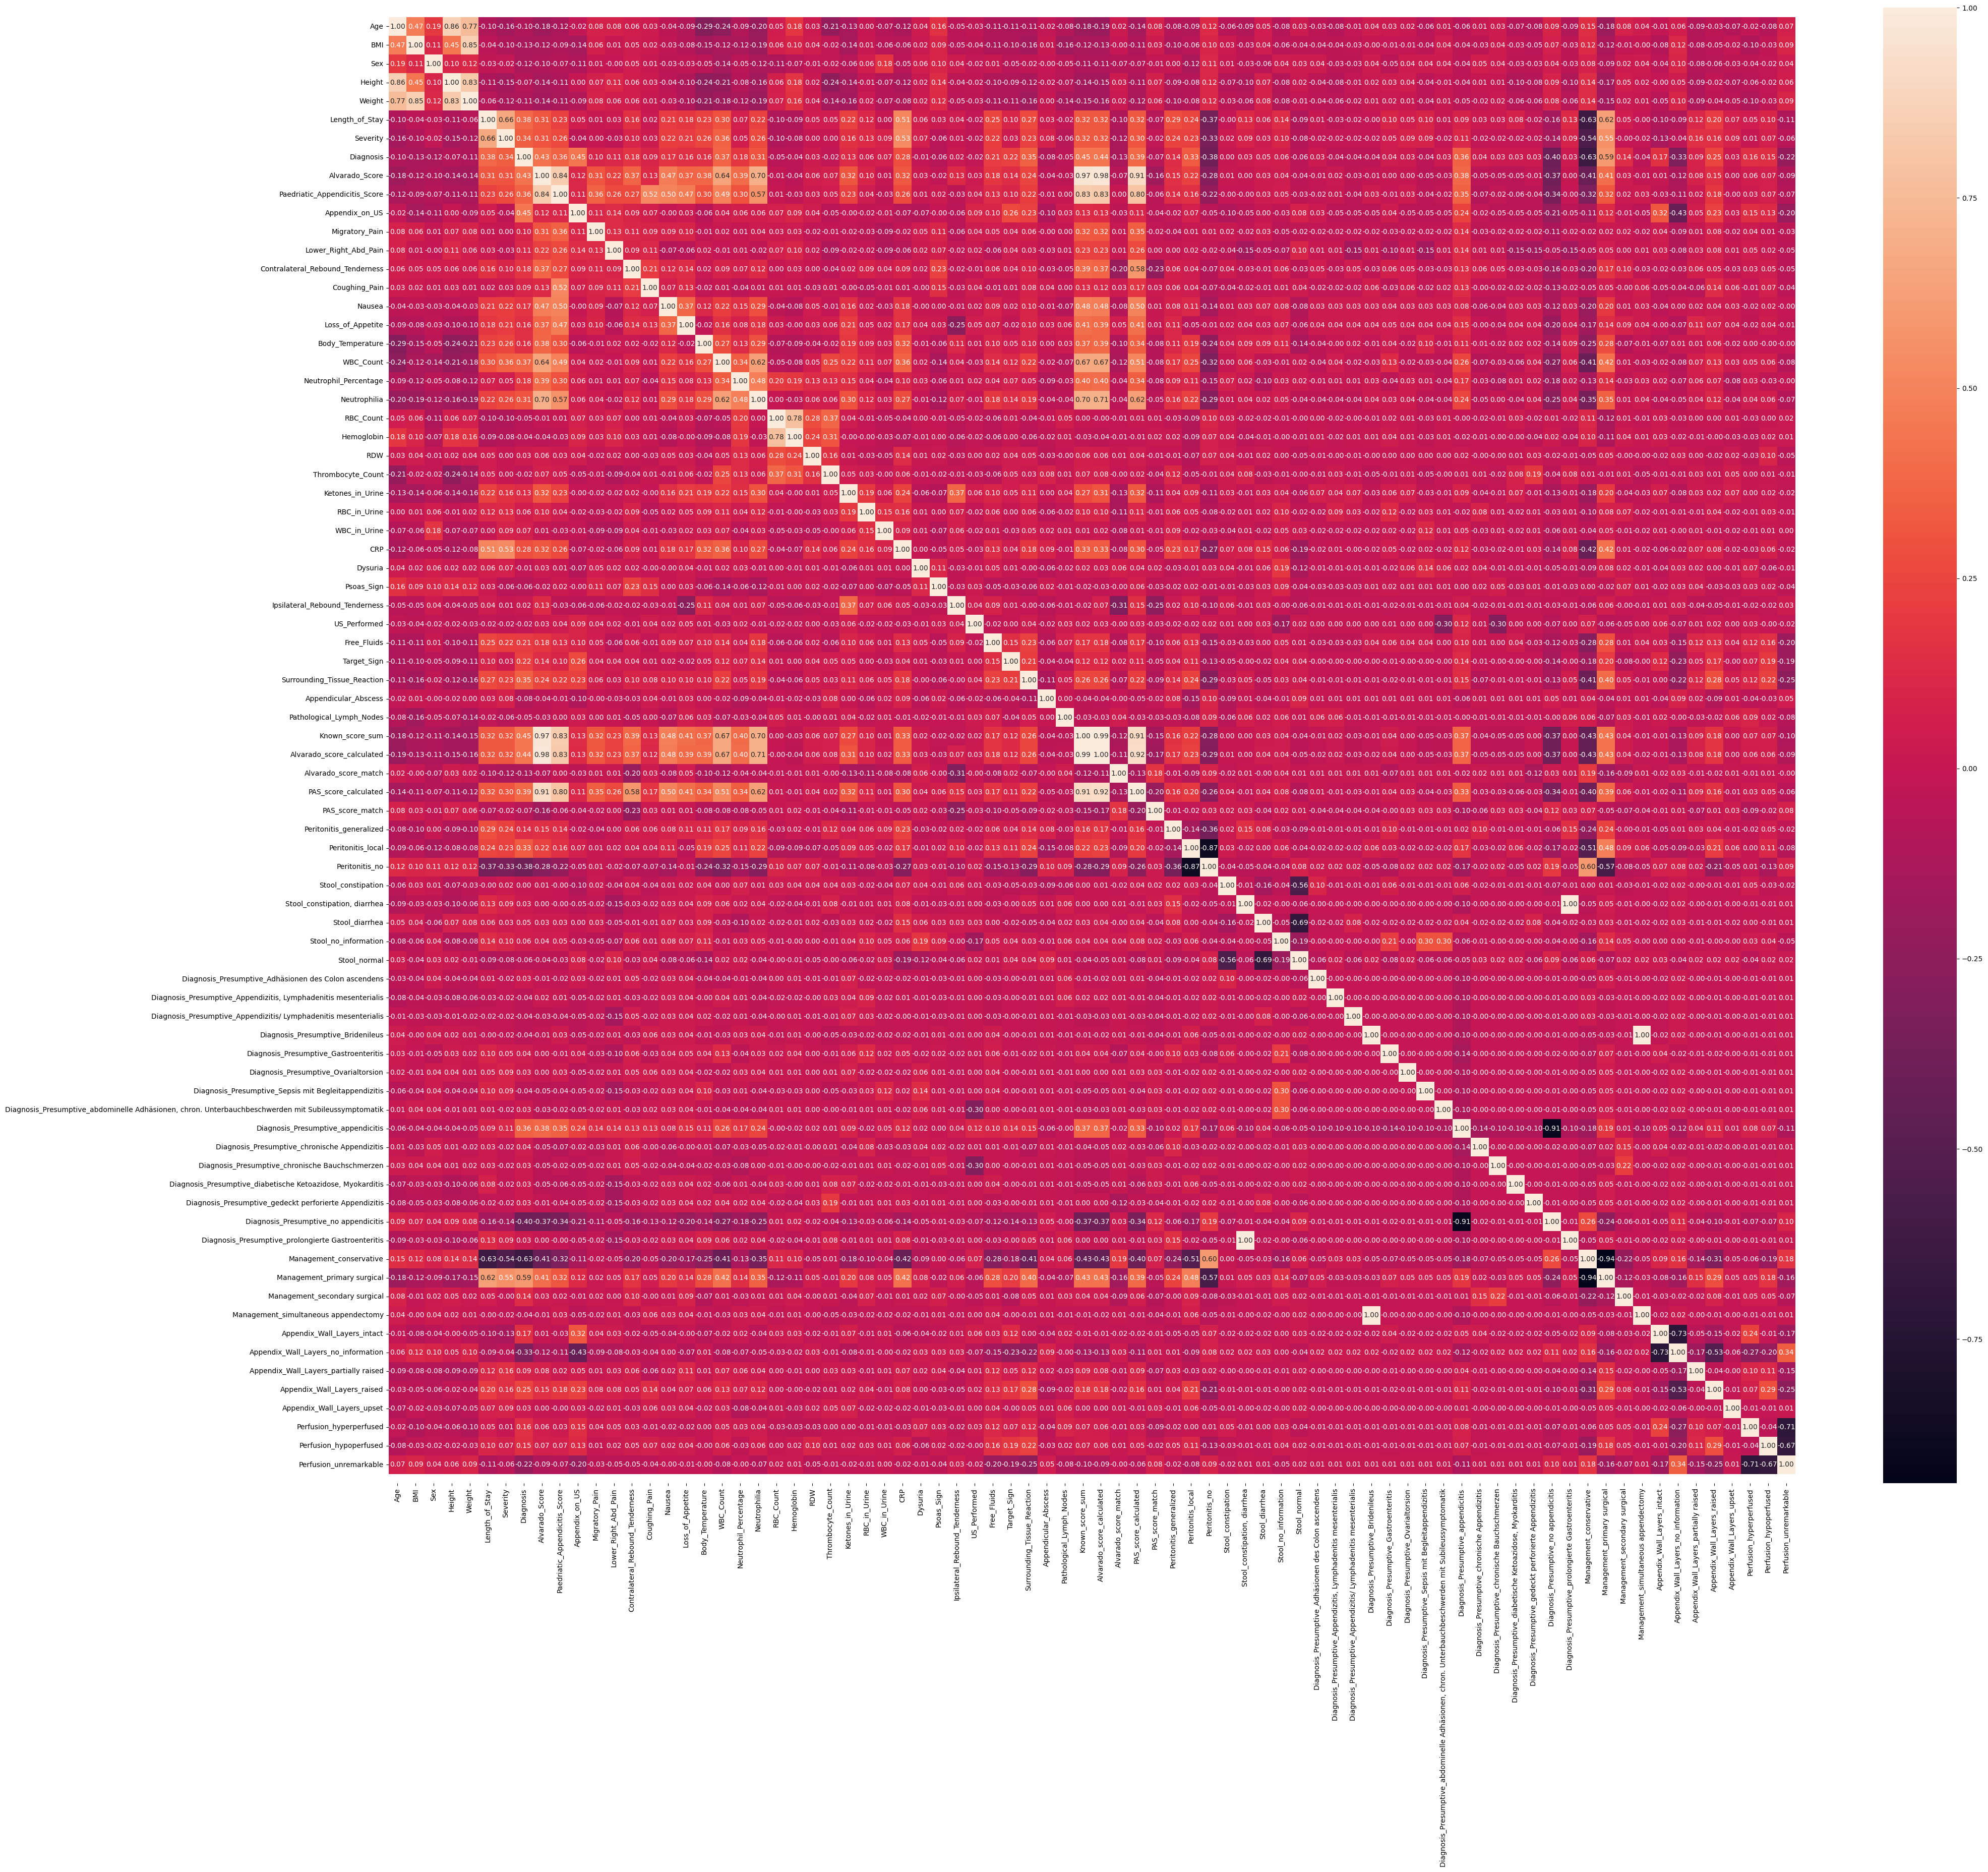

In [835]:
plt.figure(figsize = (45,38))
ax = sns.heatmap(clear_data.corr(numeric_only=True), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Let's find all attributes with correlation higher than 0.7

In [836]:
# Step 1: Correlation matrix
corr = clear_data.corr(numeric_only=True)

# Step 2: Remove self-correlations (diagonal = 1.0)
corr_no_diag = corr.where(~np.eye(corr.shape[0], dtype=bool))

# Step 3: Flatten and filter by absolute value > 0.8
strong_corrs = corr_no_diag.stack().reset_index()
strong_corrs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Step 4: Keep only unique pairs (A,B) and remove (B,A)
strong_corrs = strong_corrs[strong_corrs['Feature_1'] < strong_corrs['Feature_2']]

# Step 5: Apply the threshold
strong_corrs = strong_corrs[strong_corrs['Correlation'].abs() > 0.7]

# Step 6: Sort for readability
strong_corrs = strong_corrs.sort_values(by='Correlation', ascending=False)

# Display result
strong_corrs

,Feature_1,Feature_2,Correlation
5052,Diagnosis_Presumptive_prolongierte Gastroenter...,"Stool_constipation, diarrhea",1.000000
4226,Diagnosis_Presumptive_Bridenileus,Management_simultaneous appendectomy,1.000000
3041,Alvarado_score_calculated,Known_score_sum,0.993430
654,Alvarado_Score,Alvarado_score_calculated,0.976119
653,Alvarado_Score,Known_score_sum,0.969201
3043,Alvarado_score_calculated,PAS_score_calculated,0.924948
2966,Known_score_sum,PAS_score_calculated,0.911907
656,Alvarado_Score,PAS_score_calculated,0.909498
2,Age,Height,0.862568
80,BMI,Weight,0.850014


Removing redundant features helps to reduce the complexity of the model and improve its generalisability.

In [837]:
clear_data.drop(columns=['Height','Weight','RBC_Count','Known_score_sum',"PAS_score_match",'Alvarado_score_match'], axis=1, inplace=True)

- Let's take a look at the distribution of traits


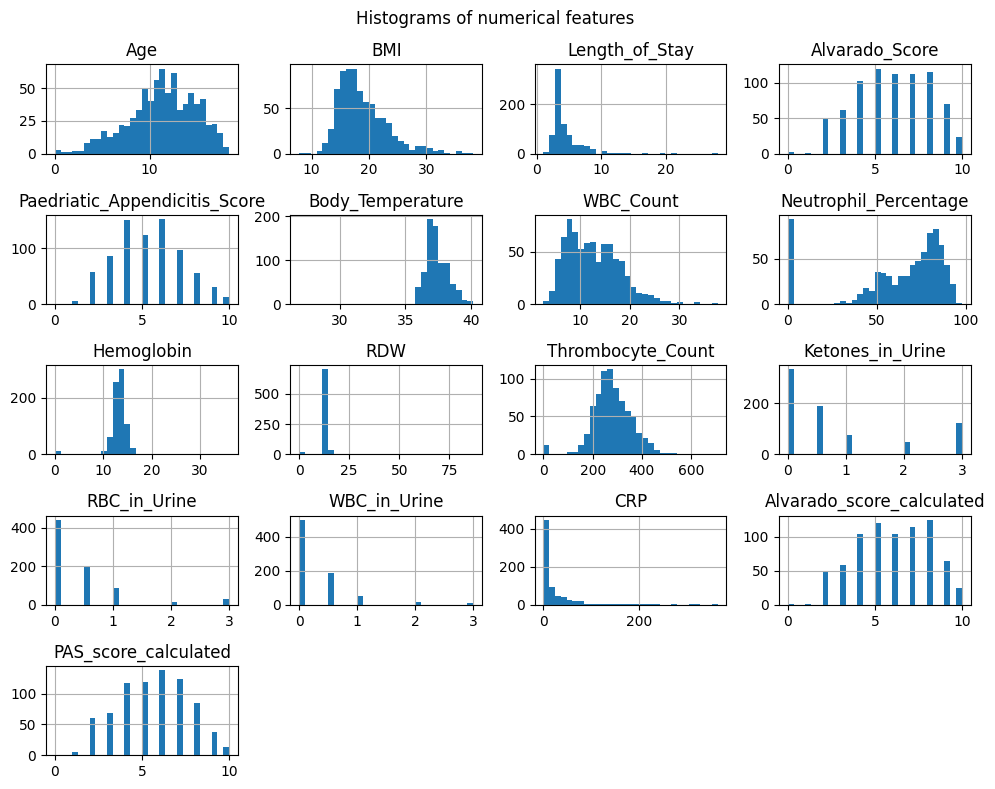

In [838]:
import math

num_cols = clear_data.select_dtypes(include='number').columns.tolist()

# Exclude binary columns (those with only 2-3 unique values)
num_cols = [col for col in num_cols if clear_data[col].nunique(dropna=True) > 3]

clear_data[num_cols].hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of numerical features")
plt.tight_layout()
plt.show()



RDW speaker has a bright outburst. Values greater than 40 are physically impossible. This is either a laboratory error or a recording error.

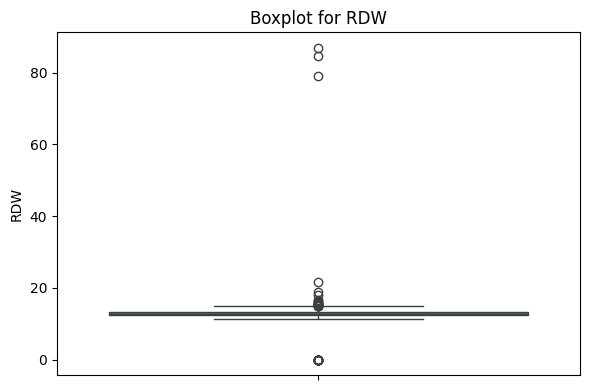

In [839]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=clear_data['RDW'])
plt.title('Boxplot for RDW')
plt.tight_layout()
plt.show()

Only three results are out. I'll replace them with 0.

In [840]:
ready_data.loc[clear_data['RDW'] > 40, 'RDW'] = 0


Hemoglobin column:


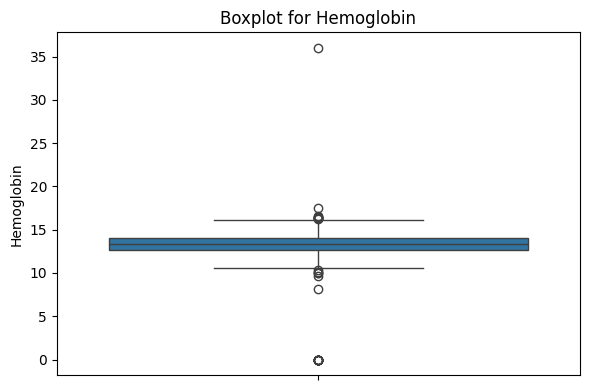

In [841]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=clear_data['Hemoglobin'])
plt.title('Boxplot for Hemoglobin')
plt.tight_layout()
plt.show()

In [842]:
clear_data.loc[ready_data['Hemoglobin'] > 30, 'Hemoglobin'] = 0

In [843]:
clear_data.to_excel('ready_data.xlsx', index=False)

### IV. Conclusion

Target variable: Diagnosis and Severity

Hypothesis: Symptoms reflecting the inflammatory process (fever, increased WBC, right lower quadrant pain and signs of peritonitis), as well as Alvarado and PA Score, are statistically significantly associated with the diagnosis of acute appendicitis in children, and their severity can predict the severity of the disease."
